<p align="center"> <img src="https://drive.google.com/uc?export=view&id=19ig7YaRrHpMhKMiVvwtqRXRWYQS-Wous"> </p>


# Task - 1 Iris Flower Classification using ML Project

##### ***Author: Saumya Gupta, Data Science Intern at LetsGrowMore***



This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Link for the dataset: http://archive.ics.uci.edu/ml/datasets/Iris

# Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the dataset

In [ ]:
#defining the features
features = ["sepal_length", "sepal_width","petal_length", "petal_width", "target_class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = features) #reading the dataset

### Displaying the first five rows of the dataset

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Displaying the information about the dataset

In [ ]:
df.shape

(150, 5)

* The dataset has 150 rows and 5 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target_class  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking for the null values in the dataset

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target_class    0
dtype: int64

* there are no null values

### Describing the dataset

In [ ]:
#Analysing the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observations:**
* The average sepal_length = 5.843333
* The average sepal_width = 3.054000
* The average petal_length = 3.758667
* The average petal_width = 1.198667

# Visualising the dataset

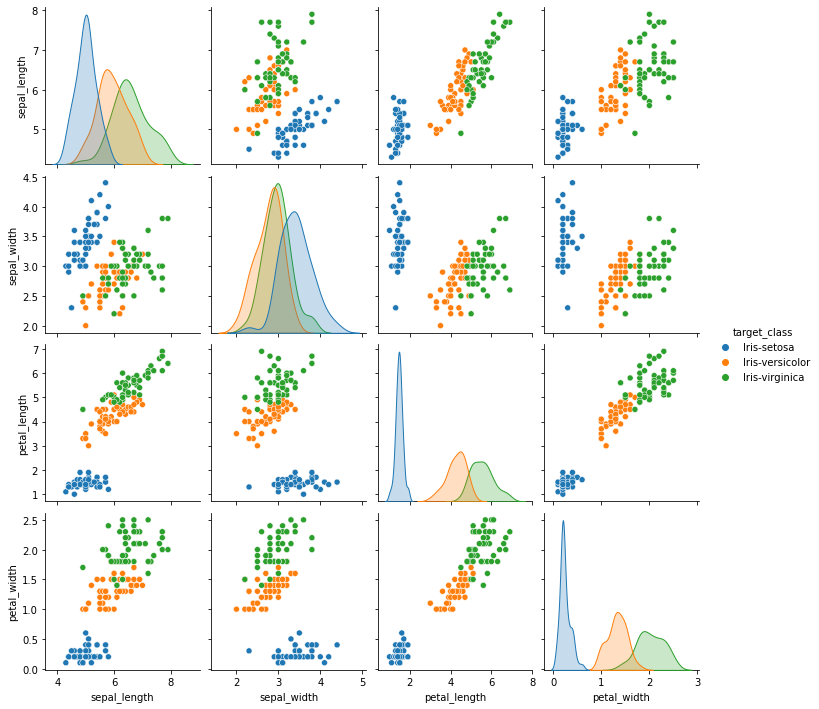

In [ ]:
sns.pairplot(df, hue = 'target_class')


**Observations from the pairplot:**
1. iris-setosa is well separated from the other two flowers.
2. iris virginica is the longest flower and iris setosa is the shortest flower.


In [ ]:
TargetClass = {}
TargetClass["Iris-setosa"] = (df["target_class"] == 'Iris-setosa').sum()
TargetClass["Iris-versicolor"] = (df["target_class"] == 'Iris-versicolor').sum()
TargetClass["Iris-virginica"] = (df["target_class"] == 'Iris-virginica').sum()

print(TargetClass)


{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


**Observations:**
* All the three species had equal number of entries in the dataset

### Visualising the above findings using a pie chart.

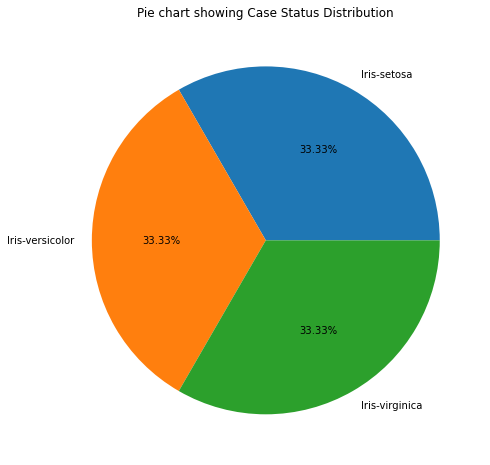

In [ ]:
labels = []
count = []
for x, y in TargetClass.items():
    labels.append(x)
    count.append(y)
plt.figure(figsize = (8, 8))
plt.pie(count, labels=labels,autopct='%1.2f%%')
plt.title('Pie chart showing Case Status Distribution')
plt.show()

### Separating the features and the target class

In [ ]:
X = df.drop('target_class', axis = 1)
Y = df['target_class']

In [ ]:
X.shape

(150, 4)

In [ ]:
Y.shape

(150,)

* Features contain 4 columns
* Target class has 1 column

# Splitting the dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )

In [ ]:
Y_train.value_counts()

Iris-setosa        42
Iris-versicolor    41
Iris-virginica     37
Name: target_class, dtype: int64

# Model Training and Evaluation

In [ ]:
#Training the Logistic Regression Model on the training dataset
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

### Model Evaluation

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy*100,'%')

96.66666666666667 %


### Plotting the classification matrix

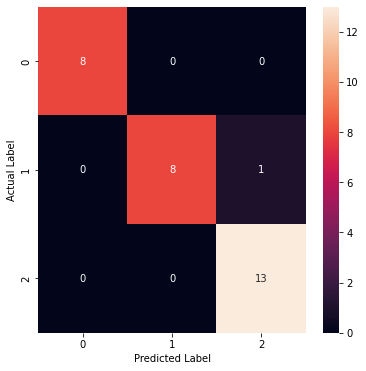

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]])

In [ ]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
CM

### Printing the classification report.

In [ ]:
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Thank You!